# Fashion MNIST

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

## Data

In [3]:
data = input_data.read_data_sets('/data/fashion/')
class_id2class_name_mapping = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'}

Extracting /data/fashion/train-images-idx3-ubyte.gz
Extracting /data/fashion/train-labels-idx1-ubyte.gz
Extracting /data/fashion/t10k-images-idx3-ubyte.gz
Extracting /data/fashion/t10k-labels-idx1-ubyte.gz


## Examples visualization

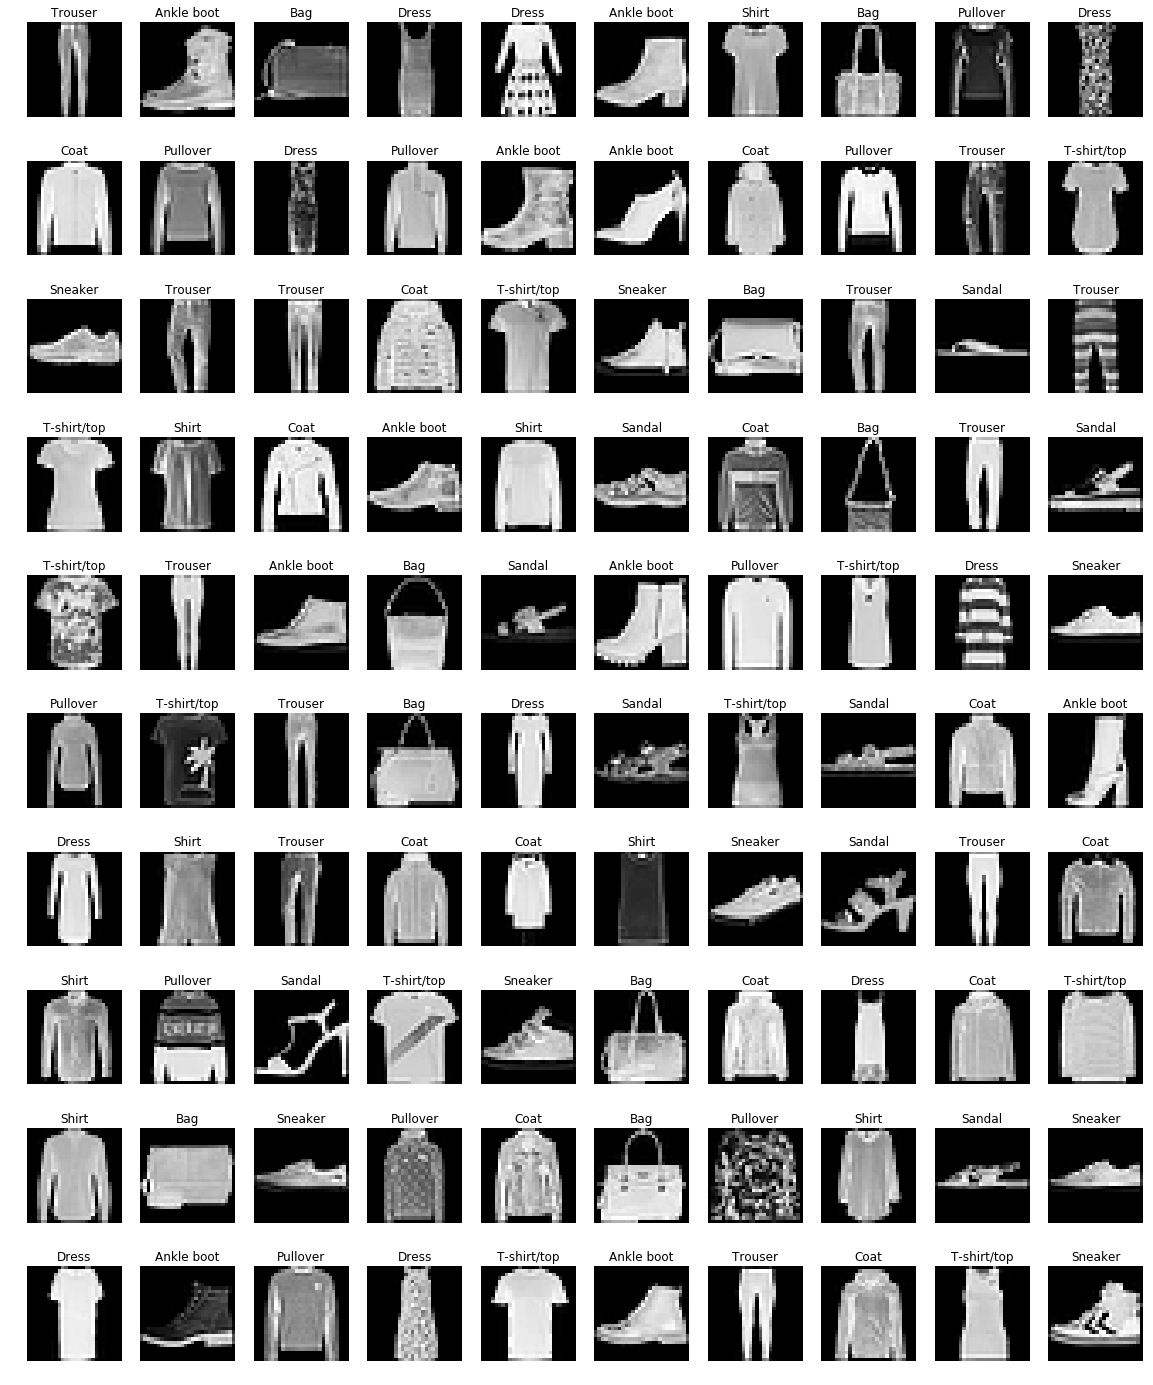

In [10]:
plt.subplots_adjust(wspace=1.5, hspace=2.5)
fig = plt.figure(figsize=(20,25))

img_batch, label_batch = data.train.next_batch(batch_size=100)
for img_id in range(100):
    ax = plt.subplot(10, 10, img_id+1)
    
    img = img_batch[img_id].reshape((28,28))
    class_name = class_id2class_name_mapping[label_batch[img_id]]
    ax.imshow(img , cmap='gray')
    ax.set_title(class_name)
    ax.axes.set_axis_off()

## Distribution visualization 

In [13]:
labels = data.validation.labels
_, labels = data.train.next_batch(100)

class_names = list(map(lambda class_id: class_id2class_name_mapping[class_id], labels))
data_frame = pd.DataFrame({'class_names':class_names, 'class_ids': labels})

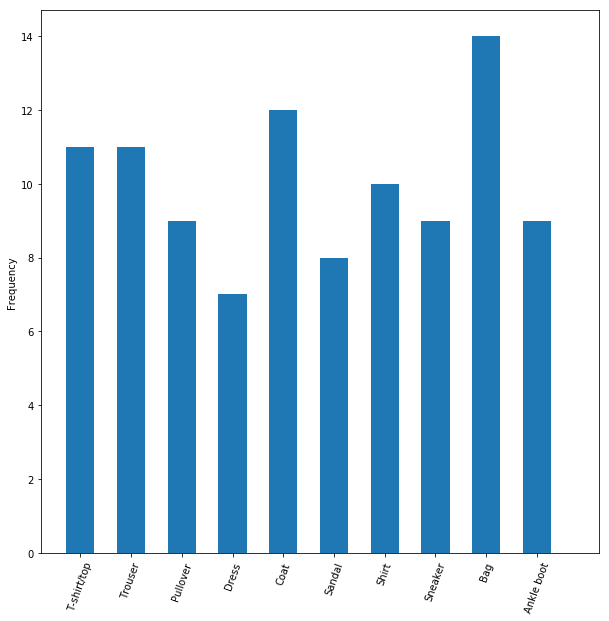

In [14]:
fig = plt.figure(figsize=(10, 10))
data_frame.loc[:,'class_ids'].plot(kind='hist', width=0.5)
ax = plt.gca()
ax.xaxis.set_ticks(np.arange(0.25, 9, 0.9))
ticks = ax.xaxis.set_ticklabels(list(class_id2class_name_mapping.values()), rotation=70)